<a href="https://colab.research.google.com/github/Andrea-hub02/CNN-Brain-Tumor-classification/blob/main/CNN_Brain_tumor_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cargar Datos de Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
root_path = '/content/drive/MyDrive/6TO SEMESTRE ANDREA SANCHEZ /Data/MRI Image Dataset for Brain Tumor'



Mounted at /content/drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Número de imágenes en entrenamiento: 5712
Número de imágenes en prueba: 1311
Número de imágenes en validación: 655


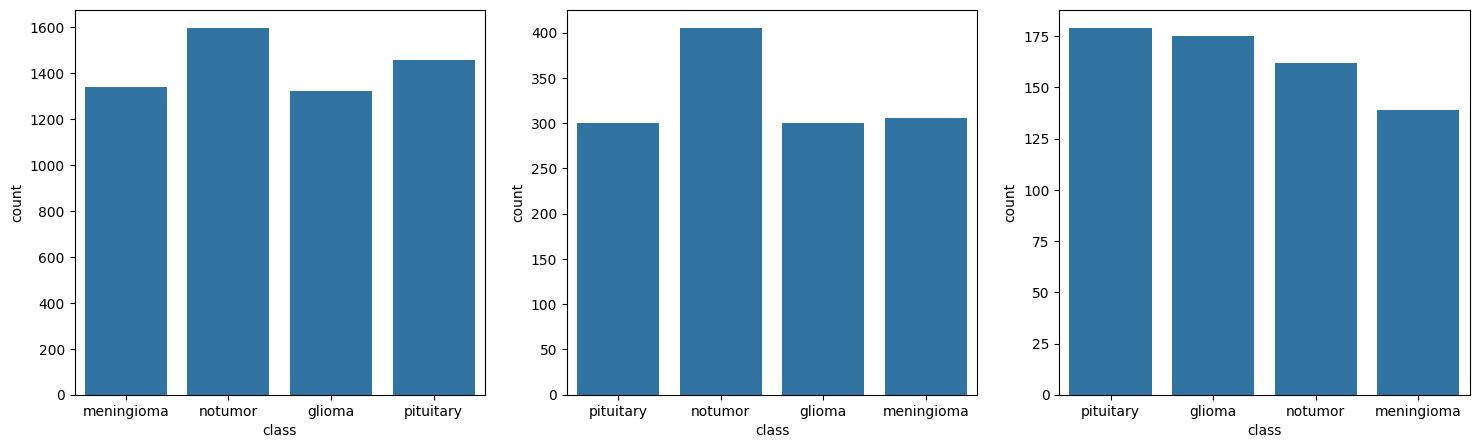

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Directorio raíz del conjunto de datos en Google Drive
#root_path = '/content/drive/MyDrive/Sexto Semestre/Vehiculos Autónomos/Proyecto/Dataset/Datos'
root_path = '/content/drive/MyDrive/6TO SEMESTRE ANDREA SANCHEZ /Data/MRI Image Dataset for Brain Tumor'

# Directorios de entrenamiento, prueba y validación
trainFolder = os.path.join(root_path, 'Training')
testFolder = os.path.join(root_path, 'Testing')
validationFolder = os.path.join(root_path, 'Validation')

# Contar la cantidad de imágenes en cada clase para el conjunto de entrenamiento
quantity_tr = {}
for folder in os.listdir(trainFolder):
    quantity_tr[folder] = len(os.listdir(os.path.join(trainFolder, folder)))

# Contar la cantidad de imágenes en cada clase para el conjunto de prueba
quantity_te = {}
for folder in os.listdir(testFolder):
    quantity_te[folder] = len(os.listdir(os.path.join(testFolder, folder)))

# Contar la cantidad de imágenes en cada clase para el conjunto de validación
quantity_val = {}
for folder in os.listdir(validationFolder):
    quantity_val[folder] = len(os.listdir(os.path.join(validationFolder, folder)))

# Crear DataFrames con la cantidad de imágenes por clase para entrenamiento, prueba y validación
quantity_train = pd.DataFrame(list(quantity_tr.items()), columns=['class', 'count'])
quantity_test = pd.DataFrame(list(quantity_te.items()), columns=['class', 'count'])
quantity_validation = pd.DataFrame(list(quantity_val.items()), columns=['class', 'count'])

# Crear gráficos de barras para visualizar la distribución de clases en los conjuntos de entrenamiento, prueba y validación
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.barplot(x='class', y='count', data=quantity_train, ax=ax[0])
sns.barplot(x='class', y='count', data=quantity_test, ax=ax[1])
sns.barplot(x='class', y='count', data=quantity_validation, ax=ax[2])

# Imprimir la cantidad total de imágenes en entrenamiento, prueba y validación
print("Número de imágenes en entrenamiento:", sum(quantity_tr.values()))
print("Número de imágenes en prueba:", sum(quantity_te.values()))
print("Número de imágenes en validación:", sum(quantity_val.values()))

# Mostrar los gráficos
plt.show()


# **Construcción del modelo - Datos Prueba**

Mounted at /content/drive
Found 5712 images belonging to 4 classes.
Found 655 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Epoch 1/10
179/179 [==============================] - 1360s 7s/step - loss: 0.6358 - accuracy: 0.7360 - val_loss: 0.5394 - val_accuracy: 0.7756
Epoch 2/10
179/179 [==============================] - 125s 694ms/step - loss: 0.3288 - accuracy: 0.8778 - val_loss: 0.2687 - val_accuracy: 0.9069
Epoch 3/10
179/179 [==============================] - 122s 679ms/step - loss: 0.2077 - accuracy: 0.9230 - val_loss: 0.2005 - val_accuracy: 0.9420
Epoch 4/10
179/179 [==============================] - 123s 684ms/step - loss: 0.1415 - accuracy: 0.9461 - val_loss: 0.0957 - val_accuracy: 0.9695
Epoch 5/10
179/179 [==============================] - 127s 709ms/step - loss: 0.0920 - accuracy: 0.9669 - val_loss: 0.0569 - val_accuracy: 0.9893
Epoch 6/10
179/179 [==============================] - 127s 706ms/step - loss: 0.0536 - accuracy: 0.9807 - val_loss: 0.043

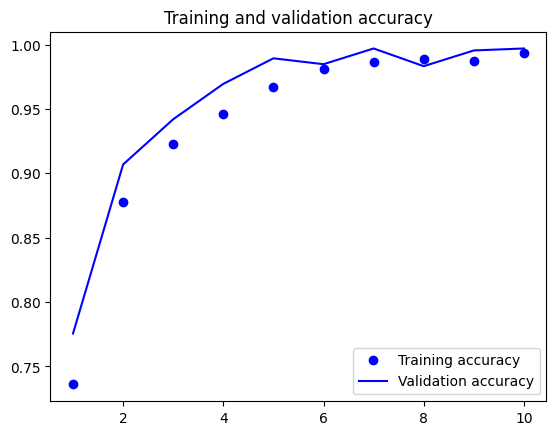

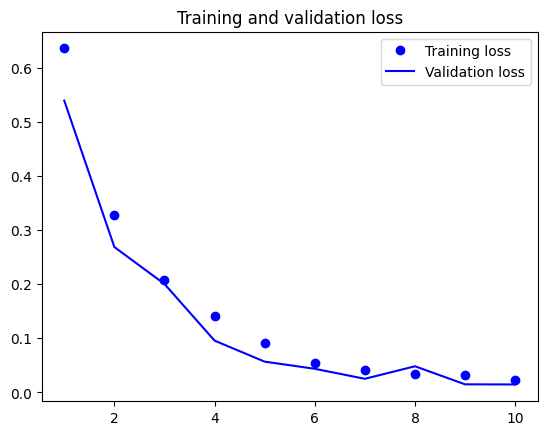

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Directorio raíz del conjunto de datos en Google Drive
#root_path = '/content/drive/MyDrive/6TO SEMESTRE ANDREA SANCHEZ /DEEP LEARNING OPTATIVA/PROYECTO CNN/DATOS'
root_path = '/content/drive/MyDrive/6TO SEMESTRE ANDREA SANCHEZ /Data/MRI Image Dataset for Brain Tumor'

# Directorios de entrenamiento, validación y prueba
trainFolder = os.path.join(root_path, 'Training')
validationFolder = os.path.join(root_path, 'Validation')
testFolder = os.path.join(root_path, 'Testing')

# Definir el generador de datos para normalización
datagen = ImageDataGenerator(rescale=1./255)

# Crear generadores de datos para entrenamiento, validación y prueba
train_generator = datagen.flow_from_directory(
    trainFolder,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'  # Utilizamos 'categorical' ya que nuestras etiquetas son categóricas
)

validation_generator = datagen.flow_from_directory(
    validationFolder,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    testFolder,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

# Definir la arquitectura de la CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # 4 clases: glioma, meningioma, no_tumor, pituitary
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)

# Evaluar el modelo con el conjunto de prueba
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

# Visualizar la precisión y la pérdida durante el entrenamiento
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


# **Construcción del modelo - Datos Validación**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 5712 images belonging to 4 classes.
Found 655 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Epoch 1/10
179/179 [==============================] - 142s 702ms/step - loss: 0.6833 - accuracy: 0.7180 - val_loss: 0.4787 - val_accuracy: 0.8214
Epoch 2/10
179/179 [==============================] - 118s 659ms/step - loss: 0.3732 - accuracy: 0.8668 - val_loss: 0.3005 - val_accuracy: 0.8977
Epoch 3/10
179/179 [==============================] - 119s 662ms/step - loss: 0.2710 - accuracy: 0.9002 - val_loss: 0.2386 - val_accuracy: 0.9176
Epoch 4/10
179/179 [==============================] - 124s 692ms/step - loss: 0.1806 - accuracy: 0.9347 - val_loss: 0.1524 - val_accuracy: 0.9573
Epoch 5/10
179/179 [==============================] - 120s 670ms/step - loss: 0.1117 - accuracy: 0.9618 - val_loss: 0.0812 - val_accuracy: 0.9802
Epoch 6/10
179/1

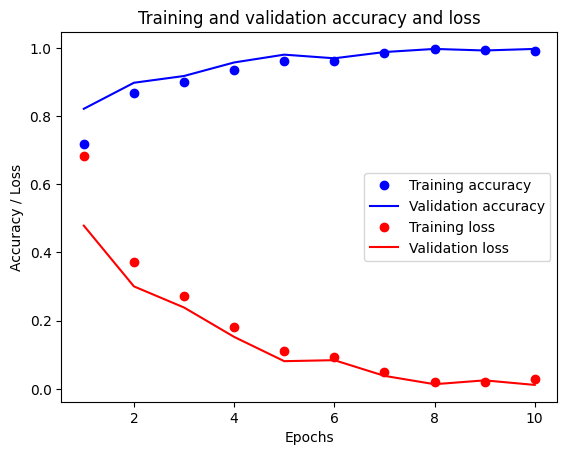

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Directorio raíz del conjunto de datos en Google Drive
#root_path = '/content/drive/MyDrive/Sexto Semestre/Vehiculos Autónomos/Proyecto/Dataset/Datos'
root_path = '/content/drive/MyDrive/6TO SEMESTRE ANDREA SANCHEZ /Data/MRI Image Dataset for Brain Tumor'

# Directorios de entrenamiento, validación y prueba
trainFolder = os.path.join(root_path, 'Training')
validationFolder = os.path.join(root_path, 'Validation')
testFolder = os.path.join(root_path, 'Testing')

# Definir el generador de datos para normalización
datagen = ImageDataGenerator(rescale=1./255)

# Crear generadores de datos para entrenamiento, validación y prueba
train_generator = datagen.flow_from_directory(
    trainFolder,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'  # Utilizamos 'categorical' ya que nuestras etiquetas son categóricas
)

validation_generator = datagen.flow_from_directory(
    validationFolder,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    testFolder,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

# Definir la arquitectura de la CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # 4 clases: glioma, meningioma, no_tumor, pituitary
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)

# Evaluar el modelo con el conjunto de prueba
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

# Evaluar el modelo con el conjunto de validación
val_loss, val_acc = model.evaluate(validation_generator)
print('Validation accuracy:', val_acc)

# Visualizar la precisión y la pérdida durante el entrenamiento
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation accuracy and loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()

plt.show()
